### 张量展示 

In [26]:
import numpy as np
x = np.array(888)
print(x)
x.ndim

888


0

In [27]:
x = np.array([1,2,3,4,5])
print(x)
x.ndim

[1 2 3 4 5]


1

In [28]:
x = np.array([[1,2,3,4],
              [5,6,7,8],
              [9,6,7,4]])
print(x)
x.ndim

[[1 2 3 4]
 [5 6 7 8]
 [9 6 7 4]]


2

In [29]:
x = np.array([[[12,4,6,8,23],
               [45,1,2,6,67]],
              [[32,7,3,5,14],
               [56,1,2,8,18]],
              [[23,7,2,5,78],
               [14,2,7,2,15]]])
print(x)
x.ndim

[[[12  4  6  8 23]
  [45  1  2  6 67]]

 [[32  7  3  5 14]
  [56  1  2  8 18]]

 [[23  7  2  5 78]
  [14  2  7  2 15]]]


3

### 图片数据基本操作 

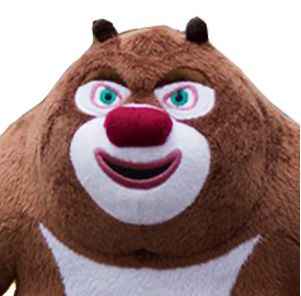

In [30]:
from PIL import Image
import requests
from io import BytesIO
response = requests.get('https://github.com/XingruiWang/RUC-Deep-Learning-Course/blob/master/NoteBook/xiongda.jpg?raw=true')
photo = Image.open(BytesIO(response.content))
photo

(301, 296)
(128, 128)


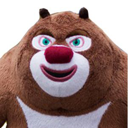

In [31]:
print(photo.size)
photo = photo.resize([128, 128])
print(photo.size)
photo

In [32]:
import numpy as np
Im = np.array(photo)
print(Im.shape)
Im[:,:,0]

(128, 128, 3)


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [ 34,  32,  58, ...,  54,  50, 129],
       [ 27,  48, 180, ...,  53,  46, 127],
       [ 37, 168, 255, ...,  54,  43, 122]], dtype=uint8)

In [33]:
Im = Im/255
print(Im[:,:,0])

[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 ...
 [0.13333333 0.1254902  0.22745098 ... 0.21176471 0.19607843 0.50588235]
 [0.10588235 0.18823529 0.70588235 ... 0.20784314 0.18039216 0.49803922]
 [0.14509804 0.65882353 1.         ... 0.21176471 0.16862745 0.47843137]]


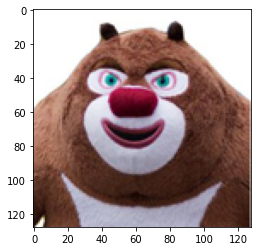

In [34]:
from matplotlib import pyplot as plt
plt.imshow(Im)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

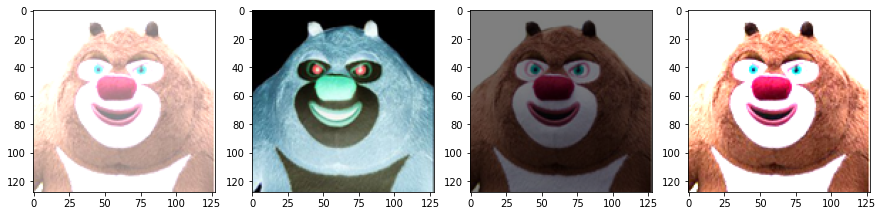

In [35]:
Im1= np.minimum(Im+0.5, 1)
Im2=1-Im
Im3=0.5*Im
Im4=Im/0.5
plt.figure()
fig,ax=plt.subplots(1,4)
fig.set_figwidth(15)
ax[0].imshow(Im1)
ax[1].imshow(Im2)
ax[2].imshow(Im3)
ax[3].imshow(Im4)

### Sigmoid函数可视化

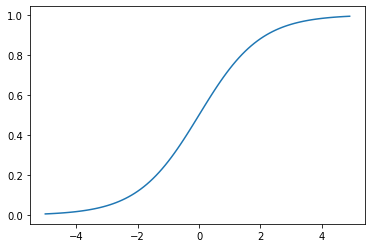

In [5]:
## sigmoid 函数实现
import numpy as np
import matplotlib.pylab as plt


def sigmoid(x):
    y = 1/(1+np.exp(-x))
    return y

x = np.arange(-5,5,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.show()

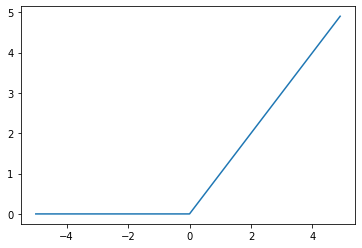

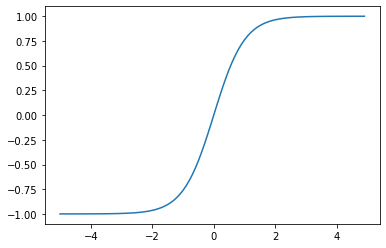

In [9]:
def ReLU(x):
  '''
  ReLU function
  '''
  return np.maximum(x, 0)

def Tanh(x):
  '''
  Tanh function
  '''
  return np.tanh(x)

y_relu = ReLU(x) # y = RelU(x)
y_tanh = Tanh(x) # y = Tanh(x)

plt.plot(x, y_relu)
plt.show()

plt.plot(x, y_tanh)
plt.show()

### 请照葫芦画瓢实现Tanh和ReLU函数，并对你的代码进行逐行注释

### MNIST数据集的可视化

In [40]:
## 载入mnist数据集
from keras.datasets import mnist

# 加载 mnist 数据集 x 和 y , 并划分训练集和测试集
# X_train, y_train 分别表示训练集的自变量（图片）和因变量（标签）
# X_test, y_test 分别表示测试集的自变量（图片）和因变量（标签），
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 输出训练集上 x, y 的形状（维度）
# x 形状为 60000 * 28 * 28 表示训练集总共有 60000 张图片，每一张图片的分辨率为 28 * 28
# y 形状为 60000 表示训练集总共有 60000 个标签
print(X_train.shape)
print(y_train.shape)
# 输出训练集第一条数据的标签值，是5
print(y_train[0])


(60000, 28, 28)
(60000,)
5
<module 'keras.datasets.mnist' from '/usr/local/lib/python3.6/dist-packages/keras/datasets/mnist.py'>


<Figure size 432x288 with 0 Axes>

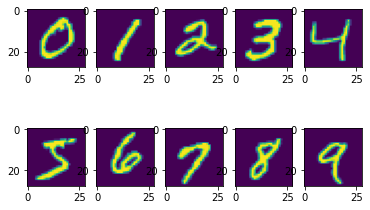

In [46]:
## 对mnist数据集进行可视化
# 载入 matplotlib.pyplot 模块，命名为 plt
from matplotlib import pyplot as plt

# 创建一个新的画板
plt.figure()

# 讲画板按照2行5列的格式分成子图
fig, ax = plt.subplots(2,5)

# ax 原本是一个 2 * 5 的numpy.ndarray
# ax.flatten() 可以将ax拉直为长度为 10 的一维向量，方便之后逐一遍历
ax=ax.flatten()

for i in range(10):
    # 循环的目的是在第 i 个子图上显示一张标签为 i 的图片数据
    # 这里循环 i 取值为0 ~ 9，也就是所有可能的标签取值
    # X_train[y_train==i] 得到的是所有训练集中标签为 i 的图片(x)，是一个列表
    Im=X_train[y_train==i][0]

    # 让 Im 以图片的形式显示在ax[i]上
    ax[i].imshow(Im)

# 显示画板的所有图片
plt.show()